In [2]:
import os
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

#Set API Key from env variable
ss_key=os.getenv("SS_API_KEY")

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url = 'https://paper-api.alpaca.markets',
    api_version = "v2"
    )

C:\Users\AdamF\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


                        time    open    high       low   close     volume  \
10 2021-10-29 00:00:00-04:00  147.19  149.94  146.4128  149.80  104258290   
62 2022-01-13 00:00:00-05:00  175.78  176.62  171.7900  172.32   71111247   
79 2022-02-08 00:00:00-05:00  171.75  175.35  171.4300  174.82   63949109   
89 2022-02-23 00:00:00-05:00  165.58  166.15  159.7500  160.07   69978171   

        20_SMA     10_SMA  Cross Signal  
10  148.789691  149.18566    1.0    buy  
62  175.436500  175.34900    0.0   sell  
79  169.368495  170.63799    1.0    buy  
89  169.927995  169.21800    0.0   sell  


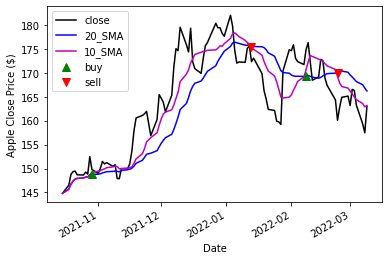

In [3]:
# Fetch Apple data from last 20 days
APPLE_DATA = api.get_barset('AAPL', 'day', limit=100).df

# Reformat data (drop multiindex, rename columns, reset index)
APPLE_DATA.columns = APPLE_DATA.columns.to_flat_index()
APPLE_DATA.columns = [x[1] for x in APPLE_DATA.columns]
APPLE_DATA.reset_index(inplace=True)

# Calculate moving averages
APPLE_DATA['20_SMA'] = APPLE_DATA['close'].rolling(window=20, min_periods=1).mean()
APPLE_DATA['10_SMA'] = APPLE_DATA['close'].rolling(window=10, min_periods=1).mean()

# Find crossover points
APPLE_DATA['Cross'] = 0.0
APPLE_DATA['Cross'] = np.where(APPLE_DATA['10_SMA'] > APPLE_DATA['20_SMA'], 1.0, 0.0)
APPLE_DATA['Signal'] = APPLE_DATA['Cross'].diff()

# Map numbers to words
map_dict = {-1.0: 'sell', 1.0: 'buy', 0.0: 'none'}
APPLE_DATA["Signal"] = APPLE_DATA["Signal"].map(map_dict)

# Preview Data
# print(APPLE_DATA.head())

# Show Relevant Buy/Sell data
print(APPLE_DATA[APPLE_DATA['Signal'] != 'none'].dropna())


# Plot stock price data
APPLE_DATA.plot(x="time", y=["close", "20_SMA", "10_SMA"], color=['k', 'b', 'm'])

# Plot ‘buy’ signals
plt.plot(APPLE_DATA[APPLE_DATA['Signal'] == 'buy']['time'],
         APPLE_DATA['20_SMA'][APPLE_DATA['Signal'] == 'buy'],
         '^', markersize=8, color='g', label='buy')

# Plot ‘sell’ signals
plt.plot(APPLE_DATA[APPLE_DATA['Signal'] == 'sell']['time'],
         APPLE_DATA['20_SMA'][APPLE_DATA['Signal'] == 'sell'],
         'v', markersize=8, color='r', label='sell')

plt.xlabel("Date")
plt.ylabel("Apple Close Price ($)")
plt.legend()
plt.show()